In [21]:
import numpy as np
import tensorflow as tf
from tensorflow. keras.preprocessing.image import load_img,img_to_array
import tensorflow.keras.backend as K
from tensorflow. keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow. keras.models import Sequential,Model,save_model,load_model
from tensorflow. keras.layers import Conv2D,Dense,Flatten;
from tensorflow. keras.regularizers import l2
from tensorflow. keras.optimizers import Adam
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

# Load model

In [40]:
cnn_model = load_model('final_model.h5')

In [48]:
def preprocess_image(image_path):
    target_size=(180, 180)
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array


def identify_imageClassification(predictions):
    probability = predictions[0][0]
    threshold = 0.5  # Set your desired threshold here
    
    if probability > threshold:
        return 1, probability
    else:
        return 0, 1 - probability
    

# Load input images

In [69]:
image_dir ='input_images/dog3.jpg'
input_image = load_img(image_dir,target_size=(180,180))

# Prediction

1/1 [==============================] - 0s 13ms/step
The image is a Dog.
Probability of being a Dog: 0.98


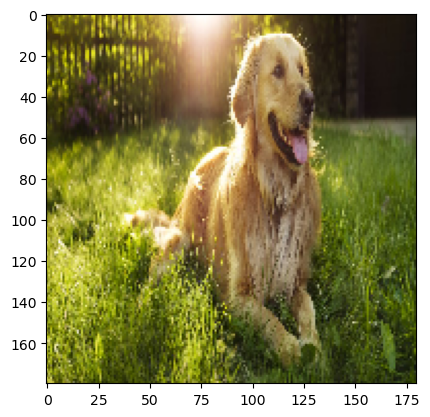

In [70]:
plt.imshow(input_image)
input_image = preprocess_image(image_dir)
predictions = cnn_model.predict(input_image)
predicted_class_index, probability = identify_imageClassification(predictions)

if predicted_class_index == 0:
    print("The image is a Cat.")
    print(f"Probability of being a Cat: {probability:.2f}")
else:
    print("The image is a Dog.")
    print(f"Probability of being a Dog: {probability:.2f}")
